In [70]:
pip install --upgrade keras

In [71]:
import keras
print(keras.__version__)

3.9.2


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [73]:
df=pd.read_csv("/content/loan_data.csv")

In [74]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [75]:
df=df.drop("Loan_ID",axis=1)

In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [77]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [79]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [80]:
df.size

4572

In [81]:
df.shape

(381, 12)

In [82]:
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [83]:
df.ndim

2

In [84]:
df.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,322
CoapplicantIncome,182
LoanAmount,101
Loan_Amount_Term,10
Credit_History,2


In [85]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

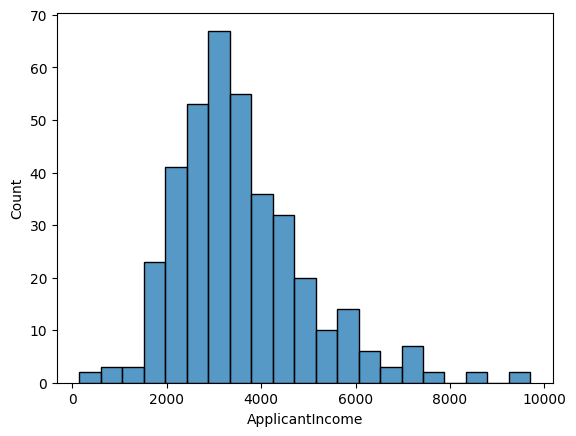

In [86]:
sns.histplot(df["ApplicantIncome"])

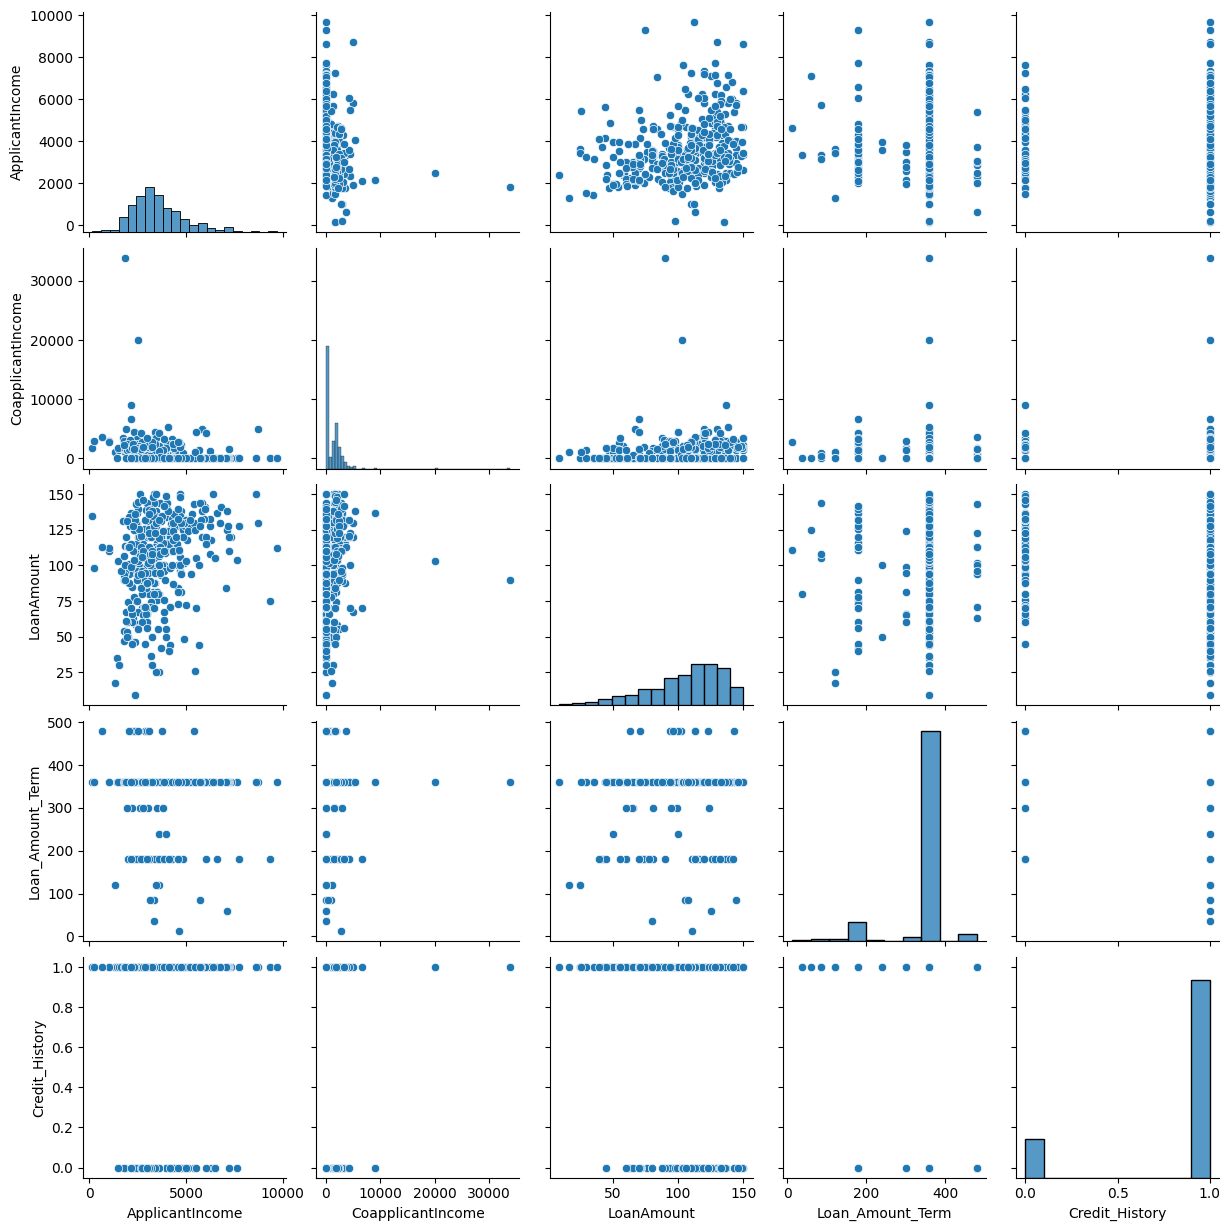

In [87]:
sns.pairplot(df)

<Axes: ylabel='ApplicantIncome'>

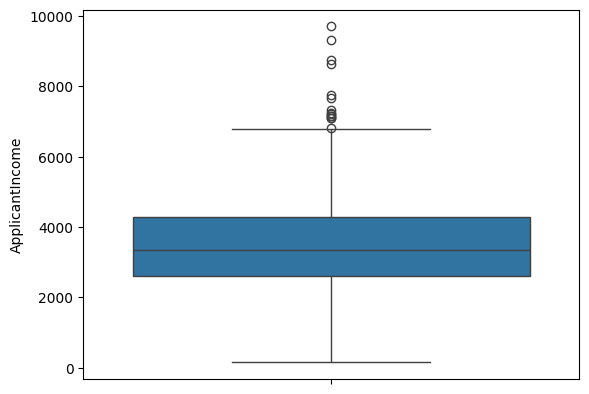

In [88]:
sns.boxplot(df["ApplicantIncome"])

<Axes: ylabel='ApplicantIncome'>

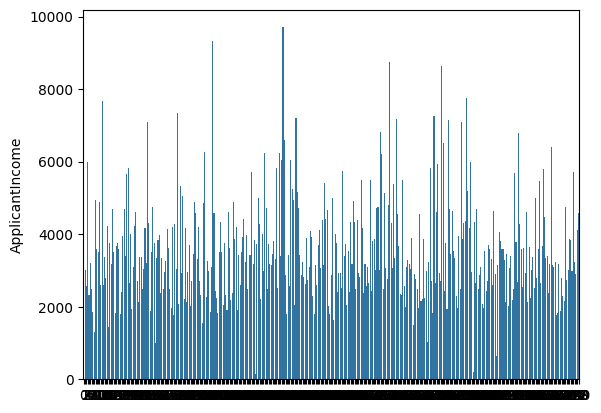

In [89]:
sns.barplot(df["ApplicantIncome"])

<Axes: ylabel='ApplicantIncome'>

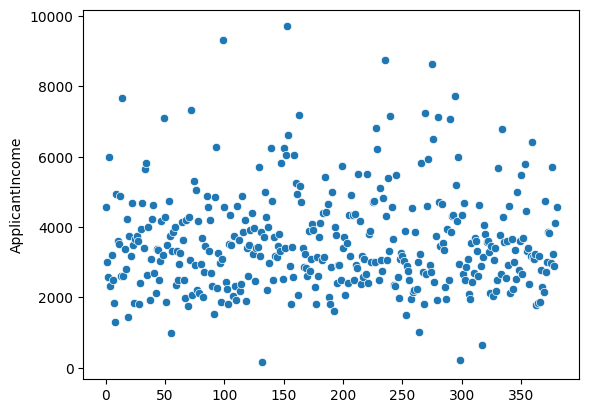

In [90]:
sns.scatterplot(df["ApplicantIncome"])

<Axes: >

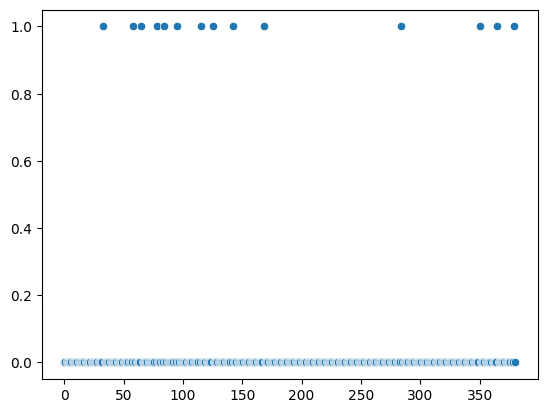

In [91]:
sns.scatterplot((df["ApplicantIncome"]>3000)&(df["LoanAmount"]<60))

In [92]:
df.isnull().sum()

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11
Credit_History,30


In [93]:
label=df['Gender'].mode()[0]

In [94]:
df['Gender'].fillna(label,inplace=True)

<ipython-input-94-9c9d69551d3c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(label,inplace=True)


In [95]:
label=df['Self_Employed'].mode()[0]

In [96]:
df['Self_Employed'].fillna(label,inplace=True)

<ipython-input-96-8907e5925938>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(label,inplace=True)


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

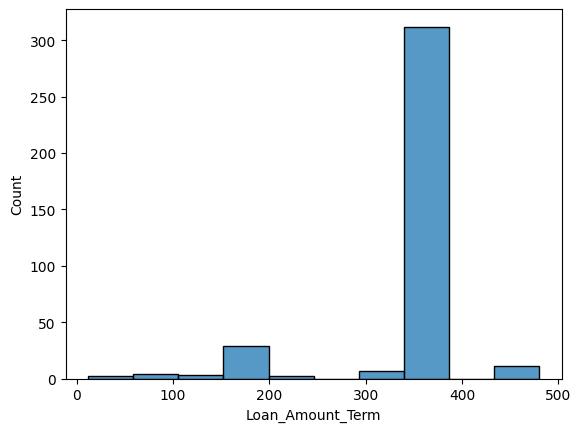

In [97]:
sns.histplot(df["Loan_Amount_Term"])

In [98]:
val=df["Loan_Amount_Term"].median()

In [99]:
df['Loan_Amount_Term'].fillna(val,inplace=True)

<ipython-input-99-c8a6dec8ec70>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(val,inplace=True)


In [100]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

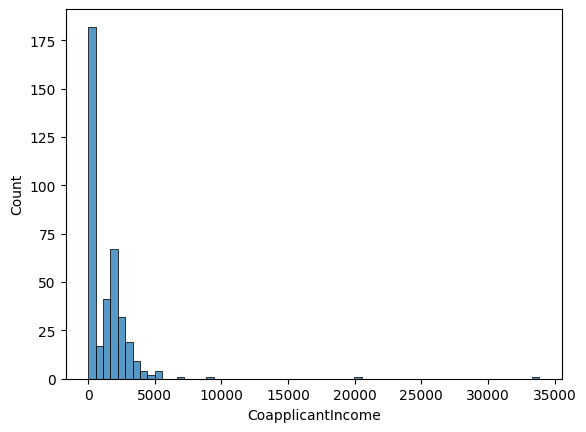

In [101]:
sns.histplot(df['CoapplicantIncome'])

In [102]:
val=df['Dependents'].mode()[0]

In [103]:
df['Dependents'].fillna(val,inplace=True)

<ipython-input-103-03f7529eff02>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(val,inplace=True)


<Axes: xlabel='Credit_History', ylabel='Count'>

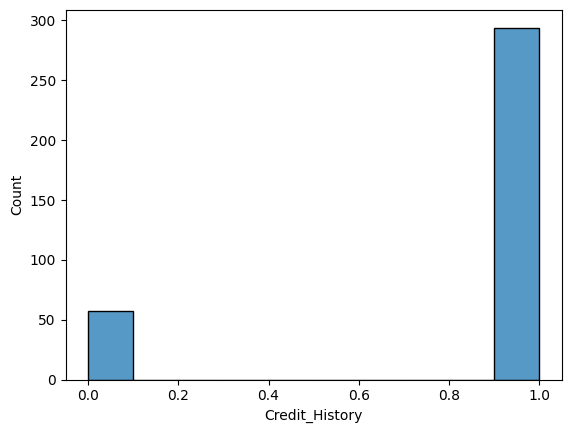

In [104]:
sns.histplot(df['Credit_History'])

In [105]:
val=df['Credit_History'].median()

In [106]:
df['Credit_History'].fillna(val,inplace=True)

<ipython-input-106-905a7663a1d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(val,inplace=True)


In [107]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le=LabelEncoder()

In [110]:
df['Gender']=le.fit_transform(df["Gender"])

In [111]:
df['Married']=le.fit_transform(df["Married"])

In [112]:
df['Education']=le.fit_transform(df["Education"])

In [113]:
df['Self_Employed']=le.fit_transform(df["Self_Employed"])

In [114]:
df['Dependents']=le.fit_transform(df["Dependents"])

In [115]:
df['Property_Area']=le.fit_transform(df["Property_Area"])

In [116]:
df['Loan_Status']=le.fit_transform(df["Loan_Status"])

In [117]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 35.8 KB


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X=df.drop('Loan_Status',axis=1)

In [121]:
y=df['Loan_Status']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [140]:
import keras
from keras import layers
from keras import ops

In [141]:
model = keras.Sequential()
model.add(keras.Input(shape=(11,)))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(4,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [142]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='BinaryCrossentropy')

In [144]:
model.fit(x=X_train,y=y_train,batch_size=32,epochs=50,verbose="auto",validation_data=(X_test,y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7197 - loss: 486.6440 - val_accuracy: 0.6979 - val_loss: 484.3270
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7330 - loss: 453.7534 - val_accuracy: 0.6979 - val_loss: 447.3888
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7276 - loss: 406.7559 - val_accuracy: 0.6979 - val_loss: 412.0605
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7190 - loss: 407.2674 - val_accuracy: 0.6979 - val_loss: 376.1723
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7369 - loss: 350.3373 - val_accuracy: 0.6979 - val_loss: 340.1134
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6938 - loss: 377.6828 - val_accuracy: 0.6979 - val_loss: 299.3109
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6772 - loss: 351.9232 - val_accuracy: 0.7083 - val_loss: 260.3116
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7343 - loss: 260.5547 - val_accura

In [145]:
model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=32,
    verbose="auto",

)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6901 - loss: 0.6945


[0.695169985294342, 0.7083333134651184]

In [146]:
model.predict(X_test, batch_size=32, verbose="auto")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [9.7256154e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.1558208e-01],
       [5.155820